In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [11]:
def calculate_roc_curve(trueList, falseList):
    thresholds = values = [i * (1/100) for i in range(101)] #np.linspace(0, 1, num=100)  # Schwellenwerte von 0 bis 1 in 100 Schritten
    tpr_values = []
    fpr_values = []
    tp = 0
    fn=0
    tn=0
    fp=0

    print("trueListLen: "+ str(len(trueList)))
    print("FalseListLen: "+ str(len(falseList)))

    for threshold in thresholds:
        for val in trueList:
            if(val >= threshold):
                tp=tp + 1
            else:
                fn=fn + 1
        for val in falseList:
            if(val >= threshold):
                fp = fp+1
            else:
                tn = tn+1
        
            
        # predicted_labels = falseList >= threshold         
        # tp = np.sum(np.logical_and(predicted_labels, trueList))
        # falseList = np.sum(np.logical_and(predicted_labels, np.logical_not(trueList)))
        # tn = np.sum(np.logical_and(np.logical_not(predicted_labels), np.logical_not(trueList)))
        # fn = np.sum(np.logical_and(np.logical_not(predicted_labels), trueList))
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tpr_values.append(tpr)
        fpr_values.append(fpr)
        if(threshold == 0.1):
            print("tpr: "+str(tpr))
            print("fpr: "+str(fpr))

    return tpr_values, fpr_values


In [12]:
inList = []
rootPath = r"C:\Users\Linus\git\cryptCorr\Results\Intervals_IMProxyDataset"
inList.append([
    "30min Event-Based Referenz",
    rootPath+"\VanillaV1_FP_1800.json",
    rootPath+"\VanillaV1_TP_1800.json"
])

inList.append(
["30min Event-Based V2",
 r"C:\Users\Linus\git\cryptCorr\Results\Results_20230606131615\FP-1800.json",
 r"C:\Users\Linus\git\cryptCorr\Results\Results_20230606131615\TP-1800.json"])
inList.append([
    "30min Event-Based V3",
    rootPath+"\HybridV2_FP_1800.json",
    rootPath+"\HybridV2_TP_1800.json"
])

Type: 30min Event-Based Referenz loaded fp 18789 and TP: 172
trueListLen: 172
FalseListLen: 18789
tpr: 0.5295983086680761
fpr: 0.10334383270675783
Type: 30min Event-Based V2 loaded fp 293771 and TP: 548
trueListLen: 548
FalseListLen: 293771
tpr: 0.674850696748507
fpr: 0.09572886240086202
Type: 30min Event-Based V3 loaded fp 18225 and TP: 162
trueListLen: 162
FalseListLen: 18225
tpr: 0.7699214365881033
fpr: 0.10793864571642349


C:\Users\Linus\AppData\Local\Temp\ipykernel_15576\1578023822.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Dark2')


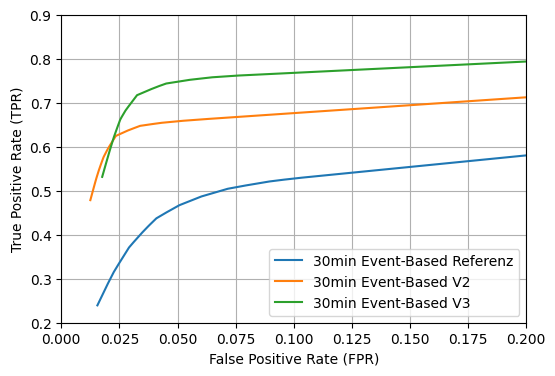

In [17]:
plt.figure(figsize=(6,4))
for ele in inList:

    fpList = []
    tpList = []

    # Datei einlesen
    with open(ele[1], 'r') as file:
        fpList = json.load(file)

    with open(ele[2], 'r') as file:
        tpList = json.load(file)

    print("Type: "+ele[0]+" loaded fp "+str(len(fpList))+" and TP: "+str(len(tpList)))

    # Berechne TPR und FPR für die ROC-Kurve
    tpr, fpr = calculate_roc_curve(tpList, fpList)
    plt.plot(fpr, tpr, label=ele[0])

# Farbkarte auswählen (hier 'viridis' verwendet)
cmap = plt.cm.get_cmap('Dark2')

#plt.plot([0, 1], [0, 1], linestyle='--', label='Diagonale', color='gray')

# Plotte die ROC-Kurve
# plt.plot(x[i], y[i], marker='o', )

plt.xlabel('False Positive Rate (FPR)')
plt.xlim(0.000,0.2)
plt.legend()
plt.grid(True)
plt.ylim(0.2,0.9)
plt.ylabel('True Positive Rate (TPR)')
# plt.title('IMProxy Dataset - 1800s')
plt.savefig(r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images\ROC_IMProxy_ImplComparison_1800_v3.png", dpi=300)
plt.show()